In [30]:
library(Stat2Data)
library(ggplot2)
data("Pulse")

In [31]:
olsmodel <- lm(Sex ~ Hgt, data = Pulse)
summary(olsmodel)


Call:
lm(formula = Sex ~ Hgt, data = Pulse)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90150 -0.20348 -0.00216  0.20574  0.80311 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.343647   0.397563   18.47   <2e-16 ***
Hgt         -0.100658   0.005817  -17.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3305 on 230 degrees of freedom
Multiple R-squared:  0.5656,	Adjusted R-squared:  0.5637 
F-statistic: 299.5 on 1 and 230 DF,  p-value: < 2.2e-16


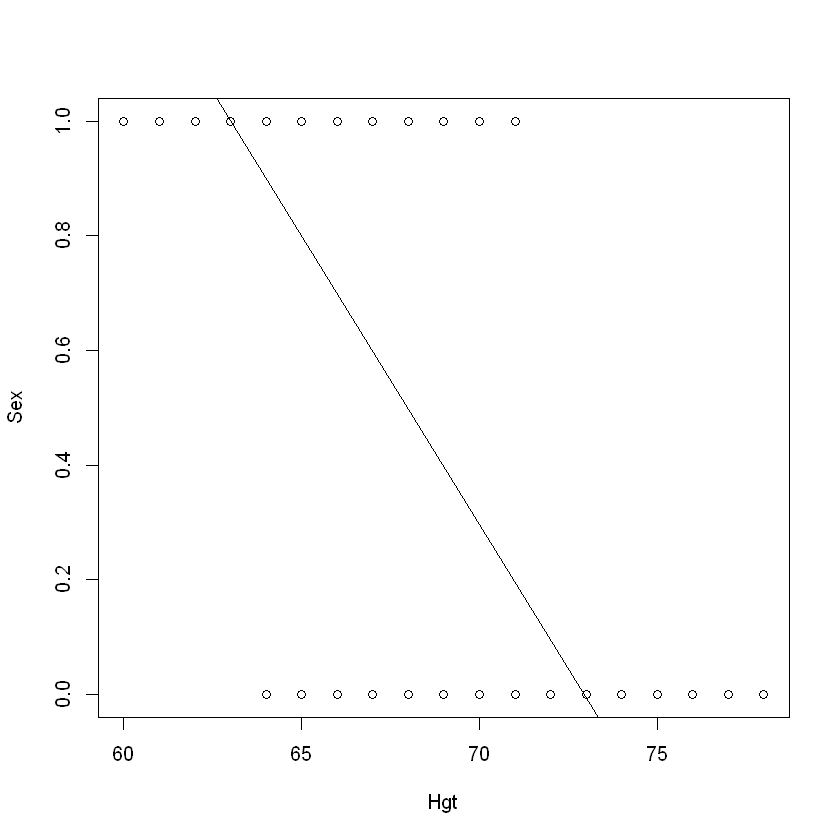

In [32]:
plot(Hgt, Sex)
abline(olsmodel)

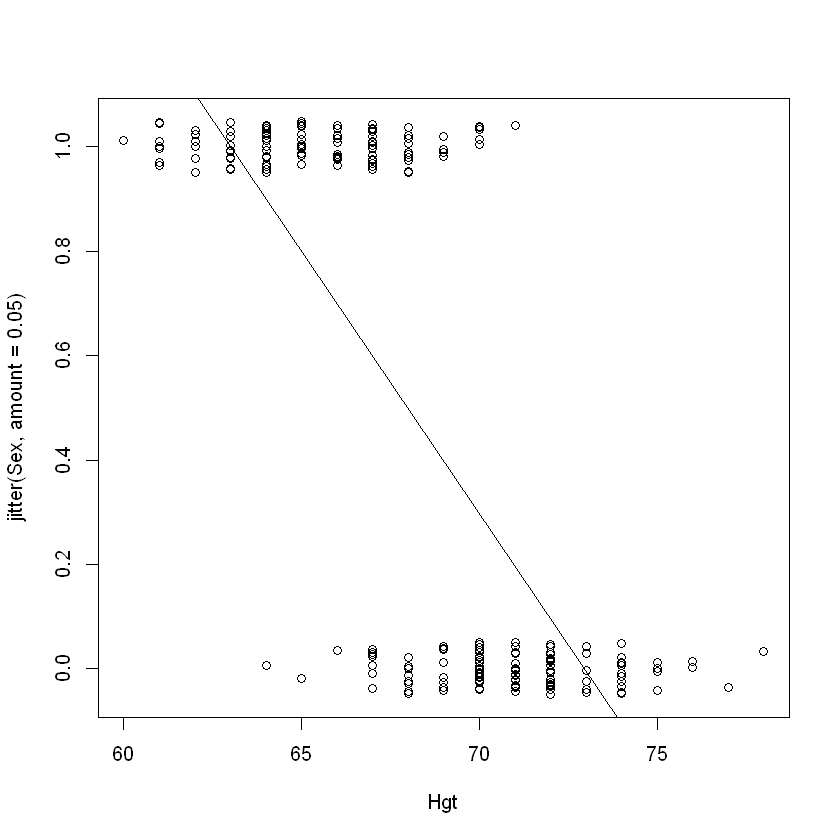

In [33]:
plot(Hgt, jitter(Sex, amount = 0.05))
abline(olsmodel)

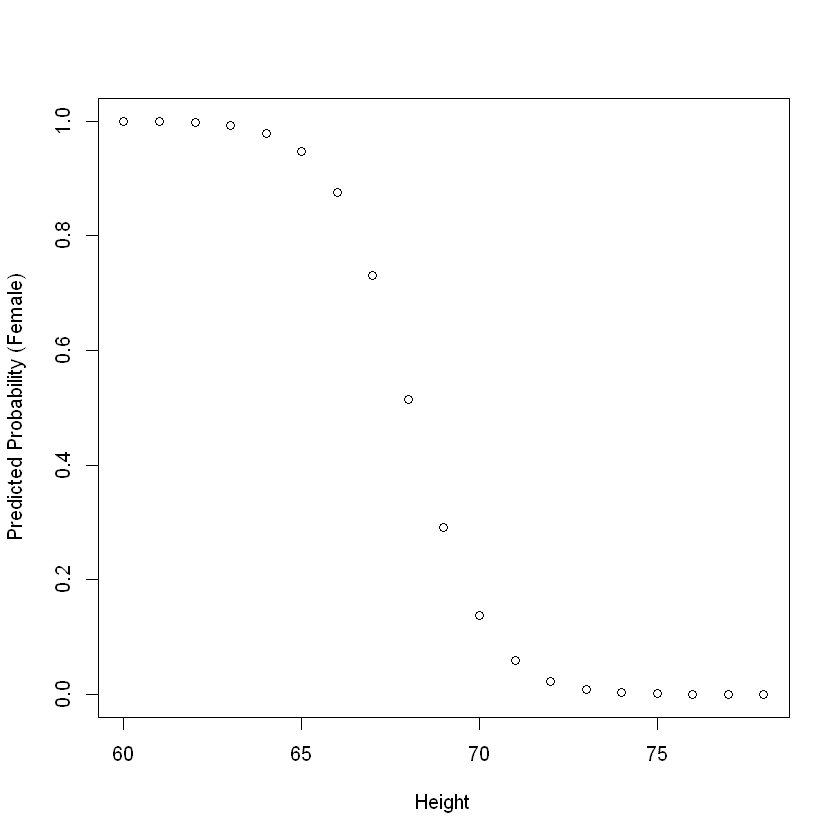

In [44]:
logitmodel = glm(Sex ~ Hgt, family = binomial)
plot(Hgt, fitted(logitmodel), xlab="Height", ylab="Predicted Probability (Female)")

`geom_smooth()` using formula = 'y ~ x'


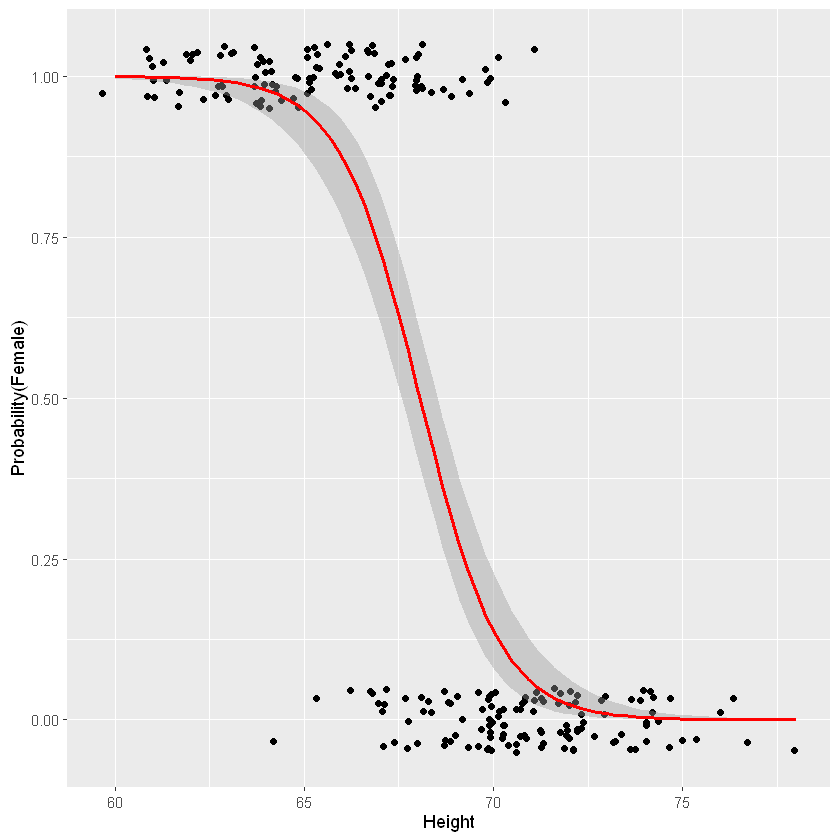

In [50]:
library(ggplot2)
library(tidyverse)
ggplot(Pulse, aes(x = Hgt, y = Sex)) +
  geom_jitter(height = 0.05) +
  stat_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") +
  labs(y = "Probability(Female)", x = "Height")

In [39]:
summary(logitmodel)


Call:
glm(formula = Sex ~ Hgt, family = binomial)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  64.1416     8.3694   7.664 1.81e-14 ***
Hgt          -0.9424     0.1227  -7.680 1.60e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 321.00  on 231  degrees of freedom
Residual deviance: 135.63  on 230  degrees of freedom
AIC: 139.63

Number of Fisher Scoring iterations: 6


In [64]:
b0 = coef(logitmodel)[1]
b1 = coef(logitmodel)[2]

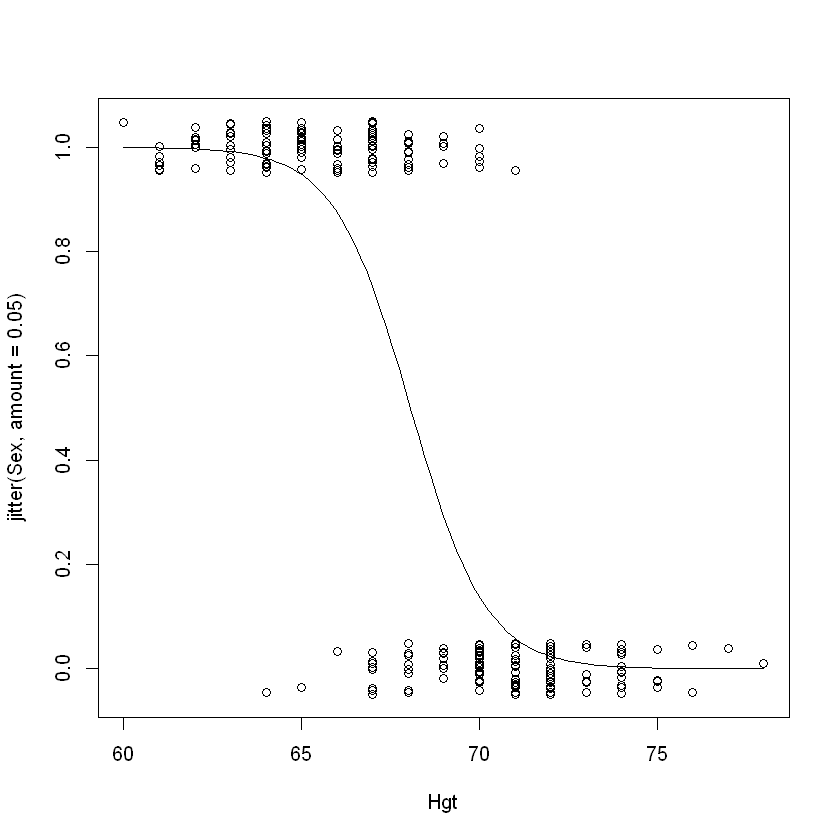

In [65]:
plot(Hgt, jitter (Sex, amount = 0.05)) 
curve(exp(b0+b1*x)/(1+exp(b0+b1*x)),add=TRUE)

In [ ]:
n_sim <- 1000
slopes <- numeric(n_sim)

obs_slope <- coef(logitmodel)[2]

for (i in 1:n_sim) {
  shuffled <- sample(Pulse$Sex)  # shuffle sex labels
  model_rand <- glm(shuffled ~ Pulse$Hgt, family = binomial)
  slopes[i] <- coef(model_rand)[2]
}

# p-value = proportion of shuffled slopes as extreme as observed
p_val <- mean(abs(slopes) >= abs(obs_slope))

hist(slopes, main = "Randomization Test: Null Distribution of Slopes",
     xlab = "Slope (Height effect on Sex)")
abline(v = obs_slope, col = "red", lwd = 2)

p_val
